In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Plots of data distribution

In [2]:
from dataset import split_dataset

In [3]:
file_txt_labels = "/home/abhishek/Desktop/RUG/hw_recognition/IAM-data/iam_lines_gt.txt"

In [4]:
_, _, train_labels, _ = split_dataset(file_txt_labels)

In [5]:
dict_label_lengths = {}

In [6]:
for label in train_labels:
    length_label = len(label)
    if length_label in dict_label_lengths:
        dict_label_lengths[length_label] += 1
    else:
        dict_label_lengths[length_label] = 1

In [7]:
train_labels[0:5]

['an effective alleviation of his painful malady. None',
 'more - and increase taxation to do so - or',
 'Germany, Dr. Adenauer is in a tough',
 "off yesterday.'",
 'out of unturned stones."']

In [8]:
arr_length_counts = np.array([list(dict_label_lengths.keys()), list(dict_label_lengths.values())]).T

In [9]:
df_length_counts = pd.DataFrame(arr_length_counts, columns=["lengths", "counts"])

In [10]:
df_length_counts = df_length_counts.sort_values(by="lengths")

In [11]:
df_length_counts.head()

,lengths,counts
61,1,1
68,3,3
72,4,1
55,5,5
56,6,11


/tmp/ipykernel_73876/2276434979.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


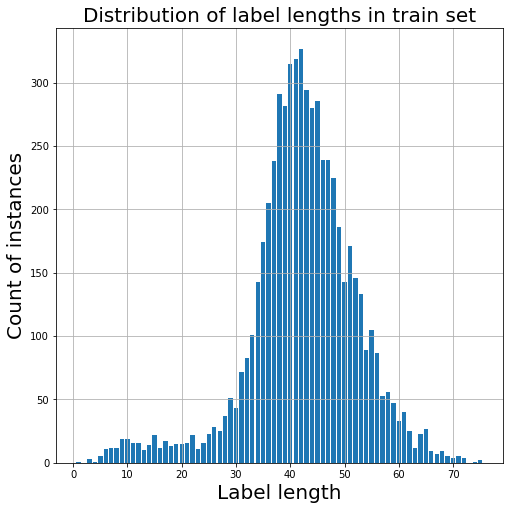

In [13]:
fig = plt.figure(figsize=(8, 8))
plt.bar(df_length_counts.lengths, df_length_counts.counts)
plt.grid()
plt.xlabel("Label length", fontsize=20)
plt.ylabel("Count of instances", fontsize=20)
plt.title("Distribution of label lengths in train set", fontsize=20)
fig.show()

## Plots of training, model: CNN - BiLSTM

In [14]:
file_train_metrics = "/home/abhishek/Desktop/RUG/hw_recognition/model_crnn/train_metrics.csv"

In [15]:
df_train_metrics = pd.read_csv(file_train_metrics)

In [16]:
df_train_metrics.head()

,epoch,loss_train,loss_valid,cer_valid,wer_valid
0,1,5.626207,3.250872,100.0000,100.0000
1,2,3.152402,3.052297,97.6795,100.0000
2,3,2.470096,1.897704,59.9964,97.0123
3,4,1.272316,1.014854,26.7363,72.0797
4,5,0.867935,0.819965,21.6262,62.5102


/tmp/ipykernel_73876/3517182828.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


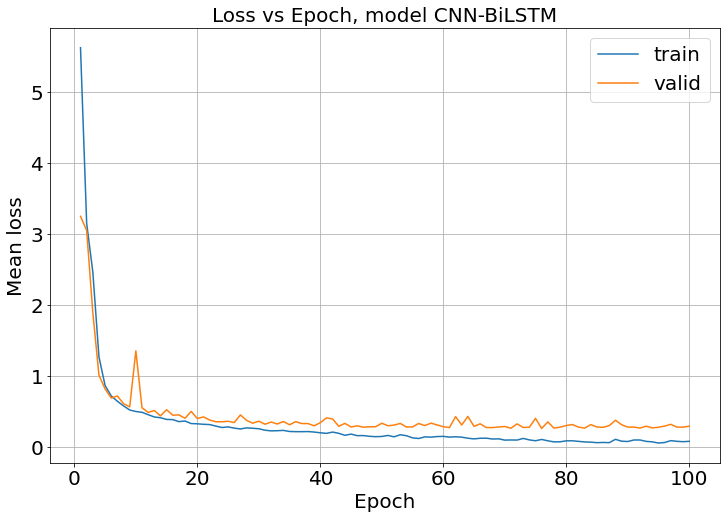

In [17]:
fig = plt.figure(figsize=(12, 8))
x_range = np.arange(1, df_train_metrics.shape[0]+1)
plt.grid()
plt.plot(x_range, df_train_metrics.loss_train, label="train")
plt.plot(x_range, df_train_metrics.loss_valid, label="valid")
plt.legend(fontsize=20)
plt.xlabel("Epoch", fontsize=20)
plt.ylabel("Mean loss", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("Loss vs Epoch, model CNN-BiLSTM", fontsize=20)
fig.show()

/tmp/ipykernel_73876/3070464543.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


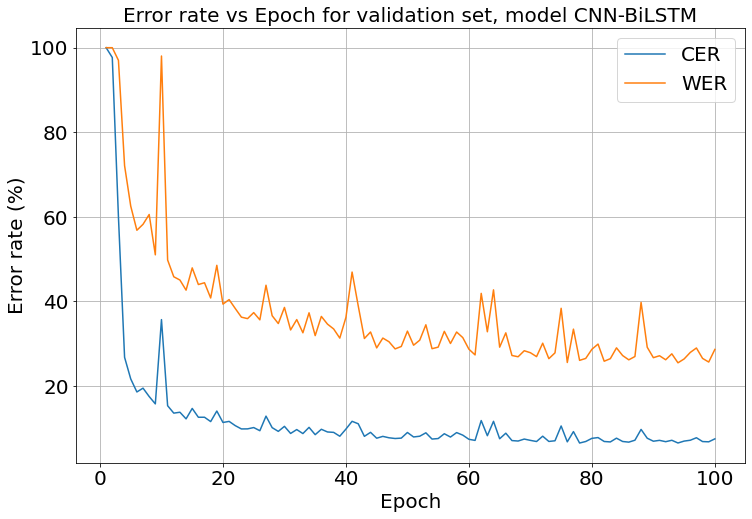

In [18]:
fig = plt.figure(figsize=(12, 8))
x_range = np.arange(1, df_train_metrics.shape[0]+1)
plt.grid()
plt.plot(x_range, df_train_metrics.cer_valid, label="CER")
plt.plot(x_range, df_train_metrics.wer_valid, label="WER")
plt.legend(fontsize=20)
plt.xlabel("Epoch", fontsize=20)
plt.ylabel("Error rate (%)", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("Error rate vs Epoch for validation set, model CNN-BiLSTM", fontsize=20)
fig.show()